## Setup

Taken from svm-2

In [12]:
import os
import pathlib
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm.notebook

# Custom utils for rasterio
from src.data_loading.rasterio_utils import get_thumbnail, read_from_lat_lon
from src.data_loading.vector_utils import shapely_to_frame
from src.data_loading.landcover_plot_utils import classes_to_rgb
from src.utils import get_byte_size, get_osm_polygon

# Path to ESA Landcover datasets on Jasmin
from src.constants import ESA_LANDCOVER_DIR, GWS_DATA_DIR, WGS84, PREFERRED_CRS

# For loading geotiff data
import rioxarray as rxr
import rasterio
from rasterio.mask import mask
from rasterio.crs import CRS
import pylandstats as pls

# For loading and manipulating vector data
import geopandas as gpd
from shapely.geometry import box, Point

# For conveniently getting longitude, latitude from name (& geodesic distances)
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="fragmentation-analysis")
logger = logging.getLogger()
logger.setLevel(logging.INFO)

import osgeo.gdal
from sklearn.ensemble import RandomForestClassifier

INFO: Disabling color, you really want to install rich.


## Landsat Data

In [13]:
landsat_path = GWS_DATA_DIR / 'gee_satellite_data'

In [14]:
landsat_chern_2015_JAS = rasterio.open(landsat_path/ '2015/L8_chern_2015_JAS.tif')

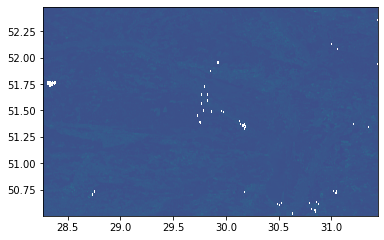

<AxesSubplot:>

In [15]:
#Inspect data:

from rasterio.plot import show
show(landsat_chern_2015_JAS)  

Try and build basic classifier using single image. Can then expand into stacking images 

In [16]:
#Load as an array
with rasterio.open(landsat_path/ '2015/L8_chern_2015_JAS.tif') as ds:
    arr_L8_chern_2015_JAS = ds.read()
    
print(arr_L8_chern_2015_JAS.shape)    #[band, row, column]

(4, 7361, 11776)


In [17]:
#stack bands to prepare for classification

stacked_L8_chern_2015_JAS = np.dstack((arr_L8_chern_2015_JAS[1],arr_L8_chern_2015_JAS[2],arr_L8_chern_2015_JAS[3]))
stacked_L8_chern_2015_JAS.shape

(7361, 11776, 3)

## ESA CCI landcover data

In [7]:
input_filepaths = [GWS_DATA_DIR / "esa_cci_rois" / f"esa_cci_{year}_chernobyl.geojson" for year in range(1992, 2016)]

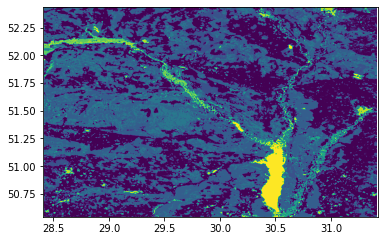

<AxesSubplot:>

In [8]:
chernobyl_2015_wgs84 = rasterio.open(input_filepaths[-1])
show(chernobyl_2015_wgs84)

In [9]:
chernobyl_2015_wgs84.shape

(681, 1086)

## Habitat data

In [ ]:
landsat_hab_2019_JAS = rasterio.open(landsat_path/ '2019/L8_hab_2019_JAS.tif')

In [ ]:
from rasterio.plot import show
show(landsat_hab_2019_JAS)

In [ ]:
#Load as an array
with rasterio.open(landsat_path/ '2019/L8_hab_2019_JAS.tif') as ds:
    arr_L8_hab_2019_JAS = ds.read()
    
print(arr_L8_hab_2019_JAS.shape)    #[band, row, column]

In [ ]:
#stack bands to prepare for classification

stacked_L8_hab_2019_JAS = np.dstack((arr_L8_hab_2019_JAS[1],arr_L8_hab_2019_JAS[2],arr_L8_hab_2019_JAS[3]))